In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('internet_service_churn.csv', delimiter=',')
print(df.columns.tolist())
print(df.head())

['id', 'is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit', 'churn']
   id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0             11.95   
1  18                 0                            0              8.22   
2  23                 1                            0              8.91   
3  27                 0                            0              6.87   
4  34                 0                            0              6.39   

   bill_avg  reamining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                 NaN                      0           0.0   
2        16                0.00                      0          13.7   
3        21                 NaN                      1           0.0

In [45]:
df = pd.read_csv('internet_service_churn.csv', header=None, names=['id', 'is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit', 'churn'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8660\4184481158.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('internet_service_churn.csv', header=None, names=['id', 'is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit', 'churn'])


In [47]:

df.update(df[['download_avg', 'upload_avg']].fillna(0))

print(df[['download_avg', 'upload_avg']].isnull().sum())

download_avg    0
upload_avg      0
dtype: int64


In [48]:
df['reamining_contract'] = df['reamining_contract'].fillna(0)

In [53]:
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Data Types:
id                             object
is_tv_subscriber               object
is_movie_package_subscriber    object
subscription_age               object
bill_avg                       object
reamining_contract             object
service_failure_count          object
download_avg                   object
upload_avg                     object
download_over_limit            object
churn                          object
dtype: object

Missing Values:
id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


In [54]:

cols_to_convert = [
    'subscription_age', 'bill_avg', 'reamining_contract', 
    'service_failure_count', 'download_avg', 'upload_avg', 
    'download_over_limit'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')


print("Data Types after conversion:")
print(df.dtypes)

Data Types after conversion:
id                              object
is_tv_subscriber                object
is_movie_package_subscriber     object
subscription_age               float64
bill_avg                       float64
reamining_contract             float64
service_failure_count          float64
download_avg                   float64
upload_avg                     float64
download_over_limit            float64
churn                           object
dtype: object


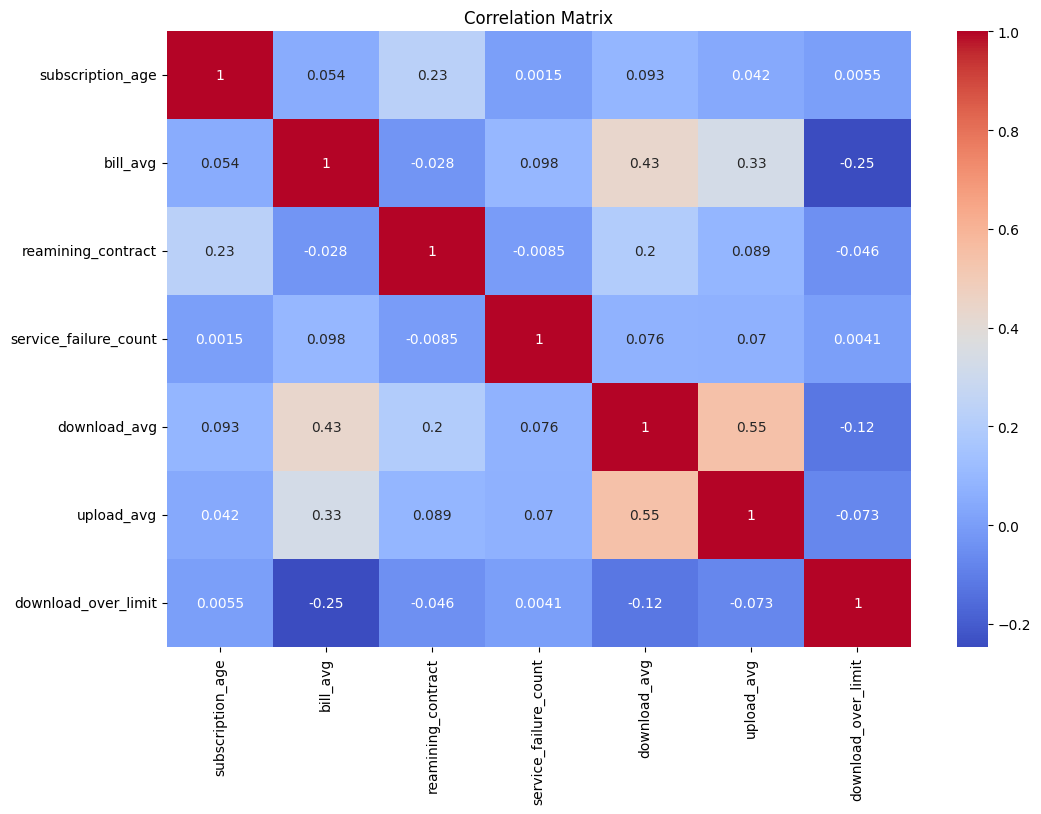

In [55]:

numeric_df = df.select_dtypes(include=['float64'])


corr_matrix = numeric_df.corr()


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [56]:
df = pd.get_dummies(df, columns=['is_tv_subscriber', 'is_movie_package_subscriber'], drop_first=True)

In [58]:
import numpy

In [60]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

variance = numeric_df.var()

print("Variance of numeric features:\n", variance)

Variance of numeric features:
 subscription_age            4.044529
bill_avg                  177.130335
reamining_contract          0.425461
service_failure_count       0.671750
download_avg             3975.400687
upload_avg                 94.952102
download_over_limit         1.081928
dtype: float64


In [61]:
df.to_csv('updated_internet_service_churn_byba.csv', index=False)